# 3. Data Mining

## 3.1. K Nearest Neighbor

In [7]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
#writing the functions
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve
from sklearn.neighbors.nearest_centroid import NearestCentroid

C:\Users\Bengi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
#Metics on Train
#cross valid should be applied only for train**
def crossvalid(data_train, target_train, est, nsplit):
    data_train_val=data_train.values
    n=data_train.shape[0]
    target_train_val=np.reshape(target_train.values,[n,])

    cross_val = StratifiedKFold(n_splits=nsplit, shuffle=True, random_state=42)
    acc_each_split = cross_val_score(estimator=est, X=data_train_val, y=target_train_val, cv=5, scoring='accuracy')
    return acc_each_split.mean()

In [5]:
#Metrics on Test
def confusion_matrix_report(y_true, y_pred):
    cm, labels = confusion_matrix(y_true, y_pred), unique_labels(y_true, y_pred)
    column_width = max([len(str(x)) for x in labels] + [5])  # 5 is value length
    report = " " * column_width + " " + "{:_^{}}".format("Prediction", column_width * len(labels))+ "\n"
    report += " " * column_width + " ".join(["{:>{}}".format(label, column_width) for label in labels]) + "\n"
    for i, label1 in enumerate(labels):
        report += "{:>{}}".format(label1, column_width) + " ".join(["{:{}d}".format(cm[i, j], column_width) for j in range(len(labels))]) + "\n"
    return report

def loggloss(target_test, model, data_test):
    probabilities=model.predict_proba(data_test)
    value=log_loss(target_test, probabilities)
    return value
    
def AUC(target_test, model, data_test):
    values=model.predict_proba(data_test)[:,1]
    auc_score=roc_auc_score(target_test, values)
    return auc_score
    
def analytics(target_test, model, data_test):#target of the test data #predictions as 0,1 #model (knnclassifier) #data_test
    y_pred=model.predict(data_test)
    print("Confusion Matrix:")
    print(confusion_matrix_report(target_test,y_pred))
    print("Accuracy Score:")
    print(accuracy_score(target_test,y_pred))
    print("Classification Report:")
    print(classification_report(target_test,y_pred))
    if(model!=nearest_centroid):
        print("Log Loss:")
        print(loggloss(target_test, model, data_test))
        print("AUC Score:")
        print(AUC(target_test, model, data_test))

In [8]:
train_data=pd.read_csv('final_train_data_StdSc.csv')
test_data=pd.read_csv('final_test_data_StdSc.csv')

In [9]:
train_data_all=train_data.drop(['msno','is_churn','Unnamed: 0'],axis=1)#this dataset shouldn't include msno and in_churn
train_target=train_data['is_churn']

In [10]:
test_target=test_data['is_churn']
test_data=test_data.drop(['msno','is_churn','Unnamed: 0'],axis=1)#this dataset shouldn't include msno and in_churn

### 3.1.1. KNN with 4 Ranked Features

In [61]:
cols=['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_actual_amount_paid']
data_indepen_m2=train_data_all[cols]
test_data_m2=test_data[cols]

k= 1
Confusion Matrix:
      Prediction
         0     1
    0218513 27037
    1 4572 12721

Accuracy Score:
0.879741899157
Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.89      0.93    245550
          1       0.32      0.74      0.45     17293

avg / total       0.94      0.88      0.90    262843

Log Loss:
4.15356765471
AUC Score:
0.812753822999
----------****************------------
k= 2
Confusion Matrix:
      Prediction
         0     1
    0229936 15614
    1 6856 10437

Accuracy Score:
0.914511704706
Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.94      0.95    245550
          1       0.40      0.60      0.48     17293

avg / total       0.93      0.91      0.92    262843

Log Loss:
2.52621925208
AUC Score:
0.854538386118
----------****************------------
k= 3
Confusion Matrix:
      Prediction
         0     1
    0222376 23174
    1 4098 13195

Accur

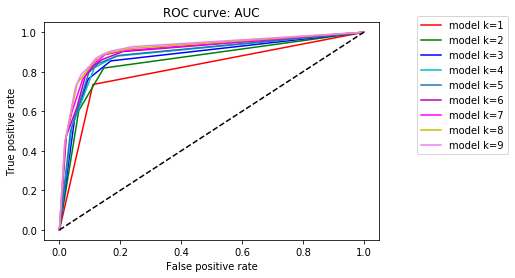

In [62]:
col=['model k=1','model k=2','model k=3','model k=4','model k=5','model k=6','model k=7','model k=8','model k=9','model k=10']
colors=["r", "g", "b","c","C0","m","fuchsia","y","violet","pink"]
for n_neighbors in range(1,10):
    knn_estimator = KNeighborsClassifier(n_neighbors)
    print("k= {}".format(n_neighbors))
    knn_estimator.fit(data_indepen_m2, train_target)
    analytics(test_target, knn_estimator, test_data_m2)
    values=knn_estimator.predict_proba(test_data_m2)[:,1]
    fpr_rf, tpr_rf, _ = roc_curve(test_target,values)
    cool=n_neighbors-1
    label=col[cool]
    plt.plot(fpr_rf, tpr_rf, color=colors[cool],label=label)
    print("----------****************------------")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve: AUC')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### 3.1.2. KNN-Choose 2,3 and 4 Ranked Features

In [63]:
cols_4=['number_of_days_201702_listened',
'is_auto_renew',
'total_cancel',
'active_days',
'avg_actual_amount_paid',
'most_fq_payment_method_id',
'num_75_mean',
'number_of_days_listened',
'num_25_201702_sum',
'num_50_201702_sum',
'num_100_201702_sum',
'num_25_201702_mean',
'num_50_201702_mean',
'num_totalsec_lasttwo_mean',
'total_churn',
'registered_via_3',
'registered_via_4',
'registered_via_7']
data_indepen_m4=train_data_all[cols_4]
test_data_m4=test_data[cols_4]

k= 1
Confusion Matrix:
      Prediction
         0     1
    0215613 29937
    1 2041 15252

Accuracy Score:
0.878338019274
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.88      0.93    245550
          1       0.34      0.88      0.49     17293

avg / total       0.95      0.88      0.90    262843

Log Loss:
4.20205594806
AUC Score:
0.880028611405
----------****************------------
k= 2
Confusion Matrix:
      Prediction
         0     1
    0227782 17768
    1 3288 14005

Accuracy Score:
0.91989134198
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.93      0.96    245550
          1       0.44      0.81      0.57     17293

avg / total       0.95      0.92      0.93    262843

Log Loss:
2.51731126041
AUC Score:
0.924705244122
----------****************------------
k= 3
Confusion Matrix:
      Prediction
         0     1
    0218534 27016
    1 1467 15826

Accura

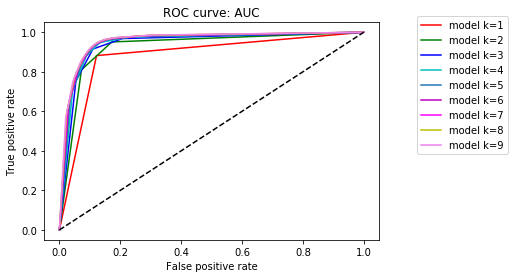

In [64]:
col=['model k=1','model k=2','model k=3','model k=4','model k=5','model k=6','model k=7','model k=8','model k=9','model k=10']
colors=["r", "g", "b","c","C0","m","fuchsia","y","violet","C1"]
for n_neighbors in range(1,10):
    knn_estimator = KNeighborsClassifier(n_neighbors)
    print("k= {}".format(n_neighbors))
    knn_estimator.fit(data_indepen_m4, train_target)
    analytics(test_target, knn_estimator, test_data_m4)
    values=knn_estimator.predict_proba(test_data_m4)[:,1]
    fpr_rf, tpr_rf, _ = roc_curve(test_target,values)
    cool=n_neighbors-1
    label=col[cool]
    plt.plot(fpr_rf, tpr_rf, color=colors[cool],label=label)
    print("----------****************------------")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve: AUC')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### 3.1.3. KNN with RFE Variables

In [8]:
cols_5=['number_of_days_listened','num_totalsec_201702_sum','num_totalsec_201702_mean','number_of_days_201702_listened','num_unq_201701_sum','number_of_days_201701_listened','num_unq_lasttwo_sum','num_100_lasttwo_mean','num_totalsec_lasttwo_mean','number_of_days_lasttwo_listened','number_of_days_lastthree_listened','most_fq_payment_method_id','is_auto_renew','total_cancel','active_days','avg_plan_list_price','avg_actual_amount_paid','registered_via_3','registered_via_4','registered_via_9']
data_indepen_m4=train_data_all[cols_5]
test_data_m4=test_data[cols_5]

k= 1
Confusion Matrix:
      Prediction
         0     1
    0217098 28452
    1 2048 15245

Accuracy Score:
0.88396114791
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.88      0.93    245550
          1       0.35      0.88      0.50     17293

avg / total       0.95      0.88      0.91    262843

Log Loss:
4.00783996547
AUC Score:
0.882850041441
----------****************------------
k= 2
Confusion Matrix:
      Prediction
         0     1
    0228450 17100
    1 3208 14085

Accuracy Score:
0.92273714727
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.93      0.96    245550
          1       0.45      0.81      0.58     17293

avg / total       0.95      0.92      0.93    262843

Log Loss:
2.43417014939
AUC Score:
0.925481451406
----------****************------------
k= 3
Confusion Matrix:
      Prediction
         0     1
    0219495 26055
    1 1461 15832

Accurac

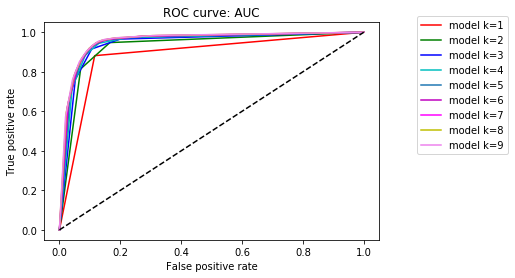

In [58]:
col=['model k=1','model k=2','model k=3','model k=4','model k=5','model k=6','model k=7','model k=8','model k=9','model k=10']
colors=["r", "g", "b","c","C0","m","fuchsia","y","violet","C1"]
for n_neighbors in range(1,10):
    knn_estimator = KNeighborsClassifier(n_neighbors)
    print("k= {}".format(n_neighbors))
    knn_estimator.fit(data_indepen_m4, train_target)
    analytics(test_target, knn_estimator, test_data_m4)
    values=knn_estimator.predict_proba(test_data_m4)[:,1]
    fpr_rf, tpr_rf, _ = roc_curve(test_target,values)
    #for columns
    cool=n_neighbors-1
    label=col[cool]
    plt.plot(fpr_rf, tpr_rf, color=colors[cool],label=label)
    print("----------****************------------")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve: AUC')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### 3.1.4. KNN with RFE using MANHATTAN Distance

k= 1
Confusion Matrix:
      Prediction
         0     1
    0217466 28084
    1 2058 15235

Accuracy Score:
0.885323177714
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.89      0.94    245550
          1       0.35      0.88      0.50     17293

avg / total       0.95      0.89      0.91    262843

Log Loss:
3.9607971226
AUC Score:
0.88331024533
----------****************------------
k= 2
Confusion Matrix:
      Prediction
         0     1
    0228546 17004
    1 3242 14051

Accuracy Score:
0.922973029527
Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.93      0.96    245550
          1       0.45      0.81      0.58     17293

avg / total       0.95      0.92      0.93    262843

Log Loss:
2.41965762807
AUC Score:
0.925943820711
----------****************------------
k= 3
Confusion Matrix:
      Prediction
         0     1
    0219600 25950
    1 1482 15811

Accurac

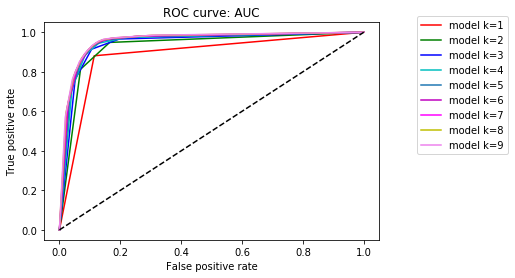

In [59]:
col=['model k=1','model k=2','model k=3','model k=4','model k=5','model k=6','model k=7','model k=8','model k=9','model k=10']
colors=["r", "g", "b","c","C0","m","fuchsia","y","violet","C1"]
for n_neighbors in range(1,10):
    knn_estimator = KNeighborsClassifier(n_neighbors, p=1)
    print("k= {}".format(n_neighbors))
    knn_estimator.fit(data_indepen_m4, train_target)
    analytics(test_target, knn_estimator, test_data_m4)
    values=knn_estimator.predict_proba(test_data_m4)[:,1]
    fpr_rf, tpr_rf, _ = roc_curve(test_target,values)
    #for columns
    cool=n_neighbors-1
    label=col[cool]
    plt.plot(fpr_rf, tpr_rf, color=colors[cool],label=label)
    print("----------****************------------")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve: AUC')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### Outputting Best KNN-Proba

In [17]:
#outputting best KNN
knn_estimator_best = KNeighborsClassifier(9,p=1)
knn_estimator_best.fit(data_indepen_m4, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=1,
           weights='uniform')

In [10]:
y_score_best=knn_estimator_best.predict_proba(test_data_m4)

In [11]:
np.savetxt("proba_best_KNN.csv",y_score_best)